In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from rich import print

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data,wine.target,test_size=0.2,random_state=1210
)

In [5]:
dtc = DecisionTreeClassifier(random_state=1184)
rfc = RandomForestClassifier(random_state=1184)

In [6]:
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1184)

In [7]:
score_dtc = dtc.score(X_test,y_test)
score_rfc = rfc.score(X_test,y_test)

In [8]:
print(f"决策树为:{score_dtc}")
print(f"随机{score_rfc}")

决策树为:0.9444444444444444

随机0.9722222222222222

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

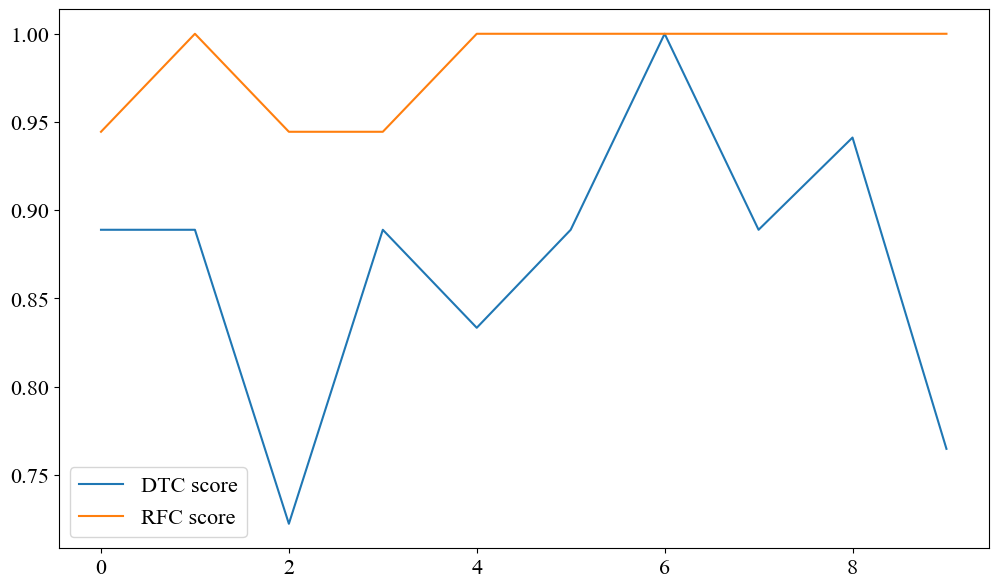

In [10]:
#单跑一次交叉验证
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfc_score = cross_val_score(rfc,wine.data,wine.target,cv=10)
dtc = DecisionTreeClassifier()
dtc_score = cross_val_score(dtc,wine.data,wine.target,cv=10)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size']  =16
plt.figure(figsize=(12,7))
plt.plot(range(10),dtc_score,label='DTC score')
plt.plot(range(10),rfc_score,label='RFC score')
plt.legend()
plt.show()

In [16]:
#跑十次交叉验证
rfc_score_ = []
dtc_score_ = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1)
    rfc_score = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    dtc = DecisionTreeClassifier()
    dtc_score = cross_val_score(dtc,wine.data,wine.target,cv=10).mean()
    rfc_score_.append(rfc_score)
    dtc_score_.append(dtc_score)

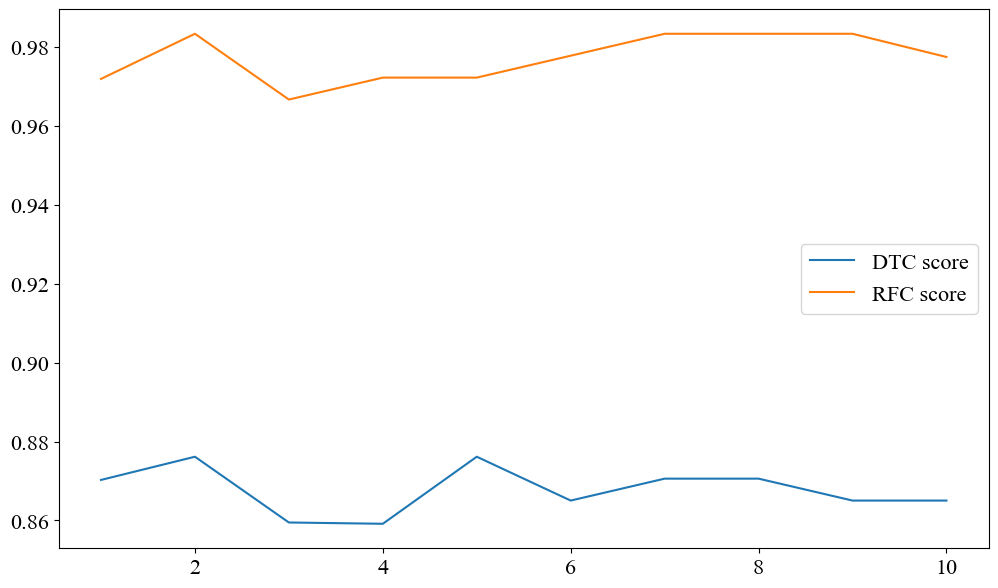

In [25]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size']  =16
plt.figure(figsize=(12,7))
plt.plot(range(1,11),dtc_score_,label='DTC score')
plt.plot(range(1,11),rfc_score_,label='RFC score')
plt.legend()
plt.show()

In [27]:
from pyecharts.charts import Line
from pyecharts.globals import ThemeType
from pyecharts import options as opts

In [29]:
line = (Line()
        .add_xaxis(xaxis_data=list(range(1,11)))
        .add_yaxis('Random Forest',y_axis=[round(i,2) for i in rfc_score_])
        .add_yaxis('Decison Tree',y_axis=[round(i,2) for i in dtc_score_])
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='cross'),
            yaxis_opts=opts.AxisOpts(max_ = 1,min_ = 0.8,splitline_opts={'show':False}),
            xaxis_opts=opts.AxisOpts(splitline_opts={'show':False}),
)
        )
line.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\模块7-机器学习基础\\进阶篇\\render.html'

In [30]:
#验证不同的树木数量的变化,确定最优的树木
rfc_score_1 = []
dtc_score_1 = []
for i in range(1,201):
    rfc = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    rfc_score = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_score_1.append(rfc_score)

In [31]:
line1 = (Line()
         .add_xaxis(xaxis_data=list(range(1,201)))
         .add_yaxis('Random Forest',y_axis=[round(i,2) for i in rfc_score_1])
         .set_global_opts(
            tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='cross'),
    yaxis_opts=opts.AxisOpts(max_ = 1,min_ = 0.8,splitline_opts={'show':False}),
    xaxis_opts=opts.AxisOpts(splitline_opts={'show':False}),
)
         )
line1.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\模块7-机器学习基础\\进阶篇\\render.html'

In [32]:
#优化方法,小确定大范围,再从大范围找小范围
superpa = []
for i in range(1,201,10):
    rfc = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    score = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(score)

In [33]:
line2 = (Line()
         .add_xaxis(list(range(1,201,10)))
         .add_yaxis('Random Forest',y_axis=[round(i,2) for i in superpa])
         .set_global_opts(
            tooltip_opts=opts.TooltipOpts(trigger='axis',axis_pointer_type='cross'),
    yaxis_opts=opts.AxisOpts(max_ = 1,min_ = 0.8,splitline_opts={'show':False}),
    xaxis_opts=opts.AxisOpts(splitline_opts={'show':False}),
         )
)
line2.render()

'C:\\Users\\wang\\Desktop\\pyLearn\\模块7-机器学习基础\\进阶篇\\render.html'

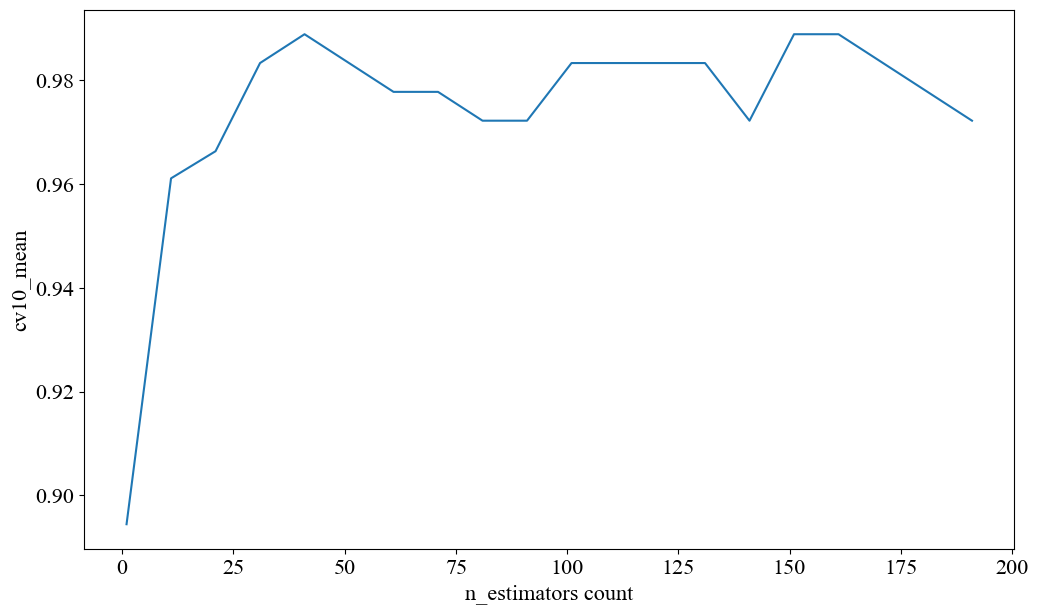

In [36]:
plt.figure(figsize = (12,7))
plt.plot(range(1,201,10),superpa)
plt.xlabel('n_estimators count')
plt.ylabel('cv10_mean')
plt.show()

In [34]:
range(1,201,10)

range(1, 201, 10)

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
#基础模型的分数
rfc = RandomForestClassifier(random_state=1210)
cross_val_score(rfc,data.data,data.target,cv=10).mean()

0.9666666666666666